# Step 1: Import Libraries

In [133]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Data Preprocessing and Feature Engineering

In [97]:
# Load Data
train_path = '../data/train.csv'
test_path = '../data/test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [98]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [99]:
## Data Preprocessing
# Selecting relevant features
features = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath', 'SalePrice']
train_selected = train_df[features].dropna()

# Feature Engineering
train_selected['TotalSqFt'] = train_selected['GrLivArea'] + train_selected['TotalBsmtSF'] + train_selected['1stFlrSF'] + train_selected['2ndFlrSF']

# Step 3: Data Preprocessing

In [101]:
# Define features and target
X = train_selected[['TotalSqFt', 'BedroomAbvGr', 'FullBath']]
y = train_selected['SalePrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression Model

In [103]:
## Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Making Predictions
predictions = model.predict(X_test)


# Step 5: Evaluate the Model

In [105]:
# Model Evaluation
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"\nRoot Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 46378.45716014101


# Step 6: Model Coefficients

In [120]:
# Model Coefficients (helps in interpretation)
print("\nModel Coefficients:")
print(f"TotalSqFt Coefficient: {model.coef_[0]:.2f}")
print(f"BedroomAbvGr Coefficient: {model.coef_[1]:.2f}")
print(f"FullBath Coefficient: {model.coef_[2]:.2f}")

## Making Predictions for Test Data
# Prepare the test data with the same features as in the training data
test_features = test_df[['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'FullBath']].copy()
test_features['TotalSqFt'] = (test_features['GrLivArea'] + test_features['TotalBsmtSF'] +
                              test_features['1stFlrSF'] + test_features['2ndFlrSF'])

# Fill missing values in the test data with the mean of the columns (same approach as training data)
test_features.fillna(test_features.mean(), inplace=True)

# Making predictions on the test set
test_predictions = model.predict(test_features[['TotalSqFt', 'BedroomAbvGr', 'FullBath']])

# Prepare the submission DataFrame
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': test_predictions
})

# Save the submission to CSV
submission.to_csv('../data/submission.csv', index=False)
print("\nSubmission file saved as 'submission.csv'.")


Model Coefficients:
TotalSqFt Coefficient: 44.23
BedroomAbvGr Coefficient: -21094.08
FullBath Coefficient: 25230.11

Submission file saved as 'submission.csv'.


# Step 7: Visualizations

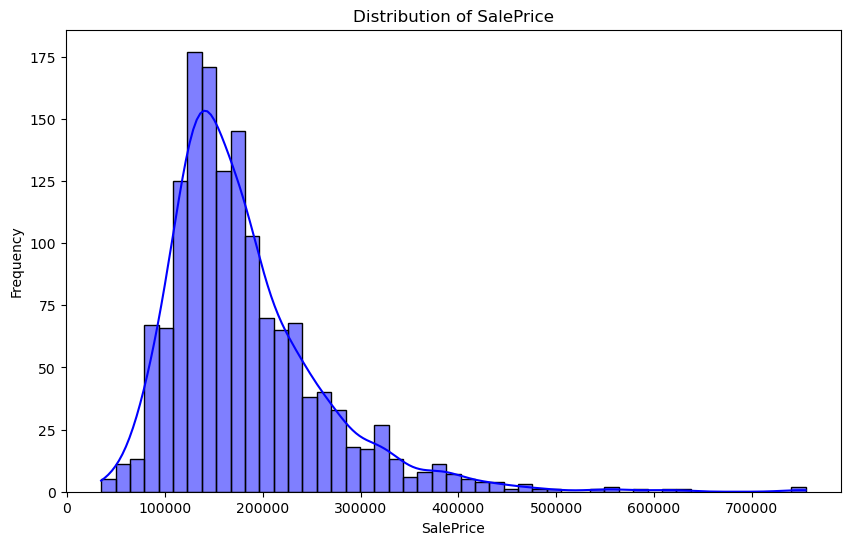

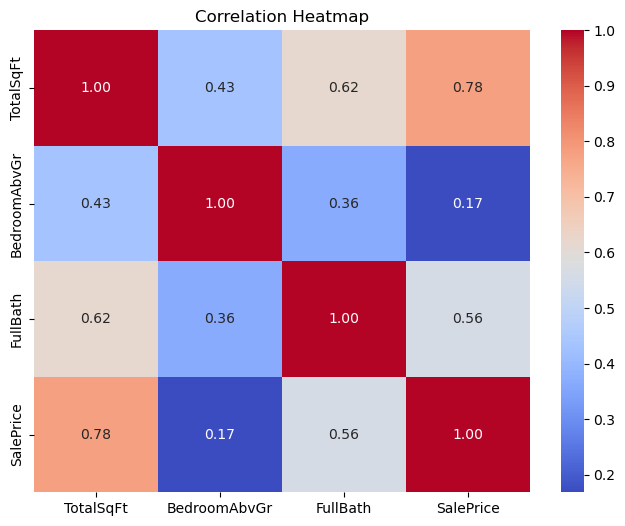

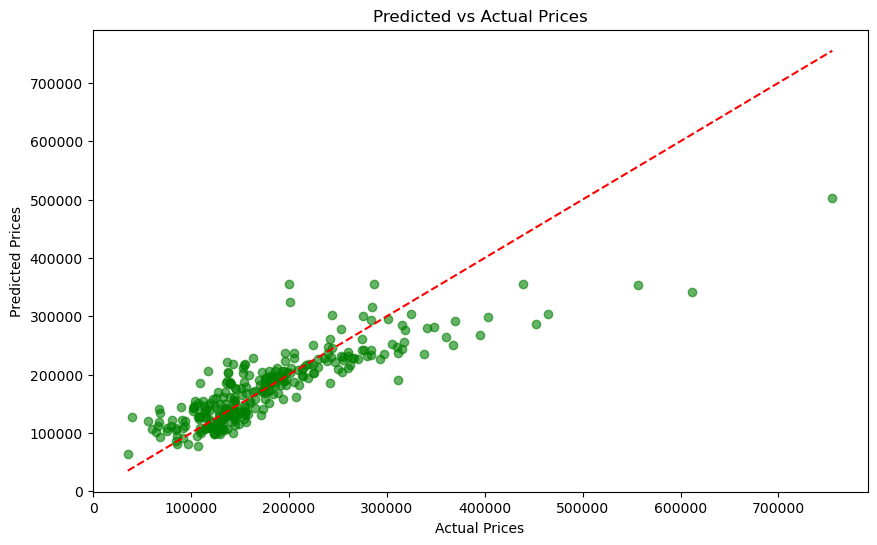

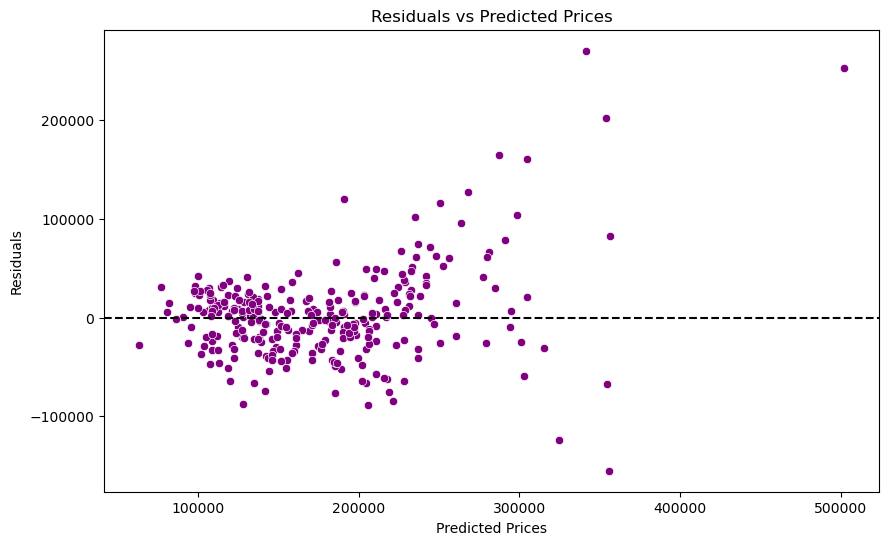

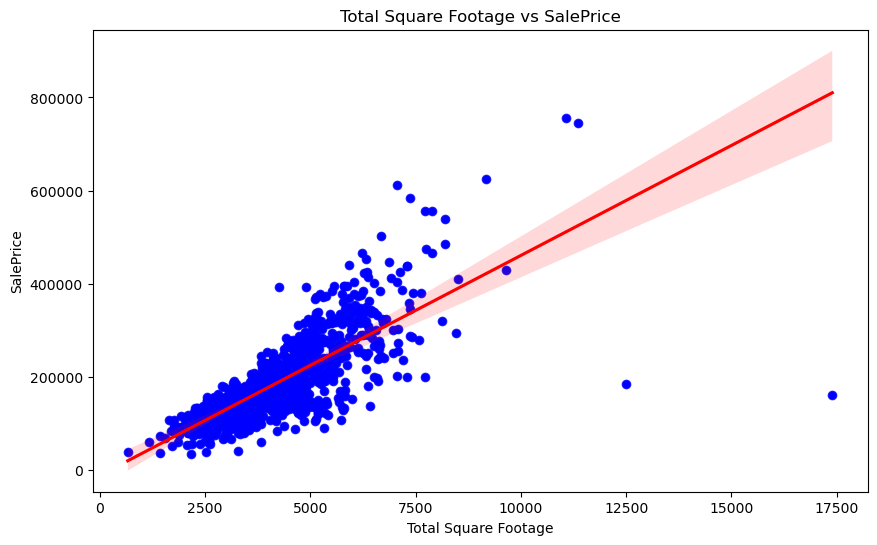

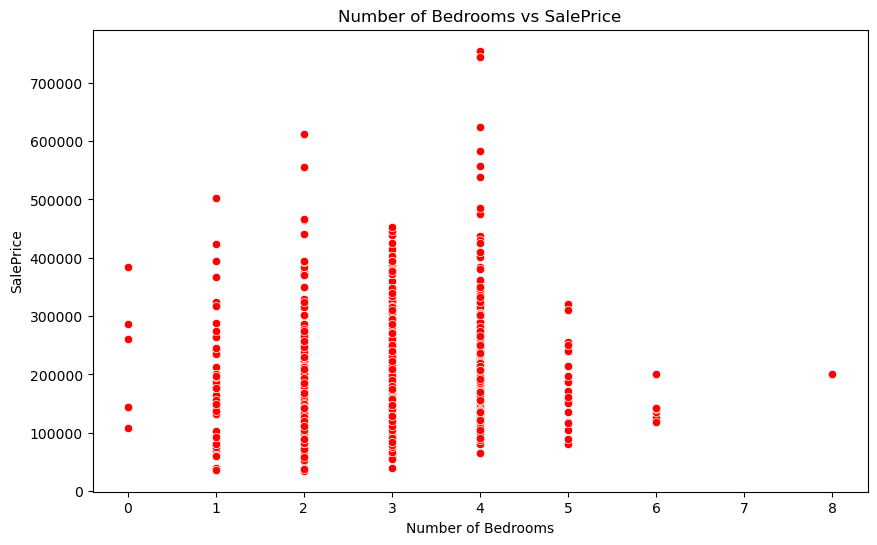

In [141]:
## Visualizations

# 1. Distribution of the Target Variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap of the Features
correlation_matrix = train_selected[['TotalSqFt', 'BedroomAbvGr', 'FullBath', 'SalePrice']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Predicted Prices vs Actual Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

# 4. Residuals Plot
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals, color='purple')
plt.axhline(0, linestyle='--', color='black')
plt.title('Residuals vs Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

# 5. Scatter Plot of TotalSqFt vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_selected['TotalSqFt'], y=train_selected['SalePrice'], color='blue')
sns.regplot(x='TotalSqFt', y='SalePrice', data=train_selected, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Total Square Footage vs SalePrice')
plt.xlabel('Total Square Footage')
plt.ylabel('SalePrice')
plt.show()

# 6. Scatter Plot of BedroomAbvGr vs SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_selected['BedroomAbvGr'], y=train_selected['SalePrice'], color='red')
plt.title('Number of Bedrooms vs SalePrice')
plt.xlabel('Number of Bedrooms')
plt.ylabel('SalePrice')
plt.show()

# Step 8: Predict Prices for New Data

In [131]:
#Predict the price for a house with 2000 sq ft, 3 bedrooms, and 2 bathrooms
def predict_price(square_feet, bedrooms, bathrooms):
    # Preprocess the input: Calculate the total square footage (assuming it's similar to TotalSqFt)
    total_sqft = square_feet  # You could adjust this logic depending on additional features

    # Prepare the feature array to match the model's input format as a pandas DataFrame
    input_data = pd.DataFrame([[total_sqft, bedrooms, bathrooms]], columns=['TotalSqFt', 'BedroomAbvGr', 'FullBath'])

    # Make the prediction using the trained model
    predicted_price = model.predict(input_data)

    return predicted_price[0]

# Predicting for a new house with specific features
new_square_feet = 1076
new_bedrooms = 3
new_bathrooms = 1

predicted_price = predict_price(new_square_feet, new_bedrooms, new_bathrooms)
print(f"\nPredicted Price for a house with {new_square_feet} sq ft, {new_bedrooms} bedrooms, and {new_bathrooms} bathrooms: ${predicted_price:,.2f}")



Predicted Price for a house with 1076 sq ft, 3 bedrooms, and 1 bathrooms: $30,322.89
